# **PRÁCTICA 1: MODELOS CONEXIONISTAS - Perceptrón simple y Adaline**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

### 1     Perceptrón simple.

Usando la librería numpy, y las necesarias para la visualización de los resultados, implementa el algoritmo del perceptron (simple).

Se recomienda crear una clase Perceptron, con los siguientes métodos:

Atributos:

- rate: Tasa de aprendizaje (parámetro η). Valor por defecto: 0.01

- n_epochs: Número máximo de épocas a ejecutar.

Métodos:

- __init__: Constructor de la clase. Asigna los parámetros rate y n_epochs al
objeto.

- fit: Inicializa los pesos (w) a valores aleatorios, e itera hasta n_epochs aplicando la regla del perceptrón: Para cada muestra de la entrada x, calcular el error e=(yd – yp) y actualizar los pesos: w = w + η·e·x. Para el primer peso (sesgo) considera x=1. Aquí yd , yp son la salida deseada y predicha, respectivamente, y η es la tasa de aprendizaje que debe ser un parámetro configurable. Recuerda almacenar el error cometido en cada época en una variable.

- net_input: Implementa el producto escalar entre x y w.

- predict: calcula la salida {0,1} en función del signo del producto escalar entre x y w. ¡Ten en cuenta que si las clases son {0,1} el umbral está en 0.5 y no 0!

In [ ]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [ ]:
class SimplePerceptron():

    def __init__(self, rate=0.01, n_epochs=100):
        """
        :param rate: tasa de aprendizaje
        :param n_iter: número de épocas a ejecutar
        """
        self.rate = rate
        self.n_epochs = n_epochs
        
    def fit(self, X, y):
        
        # Generamos pesos (w) iniciales aleatorios
        self.weights = np.random.random_sample((X.shape[1] + 1,))
        self.weights2 = np.random.random_sample((X.shape[1] + 1,))
        # Creamos dos listas para añanir el valor de la funcion del error
        self.errors = []
        self.errors2 = []
        
        for i in range(self.n_epochs):
            errors = 0
            errors2 = 0
            
            for features, expected in zip(X,y):
                delta_weight = self.rate * (expected - self.predict(features))
                delta_weight2 = self.rate * ((expected - self.predict(features))**2)
                self.weights[1:] += delta_weight * features
                self.weights2[1:] += delta_weight2 * features
                self.weights[0] += delta_weight * 1
                self.weights2[0] += delta_weight2 * 1
                errors += int(delta_weight != 0.0)
                errors2 += int(delta_weight2 != 0.0)
            self.errors.append(errors)
            self.errors2.append(errors2)
        return  self.weights 
   

    def net_input(self, X):
        """
        Calcula el producto de las entradas por sus pesos
        :param X: datos de entrenamiento con las caracteristicas. Array
        """
        zeta = np.dot(1, self.weights[0]) + np.dot(X, self.weights[1:])
        return zeta

    def predict(self, X):
        """
        Calcula la salida de la neurona teniendo en cuenta la función de activación
        :param X: datos con los que predecir la salida de la neurona. Array
        :return: salida de la neurona
        """
        output = np.where(self.net_input(X) >= 0.5, 1, 0)
        return output

Utiliza el perceptrón en los siguientes casos (aquí x1 y x2 son las entradas al perceptrón y d la señal deseada:

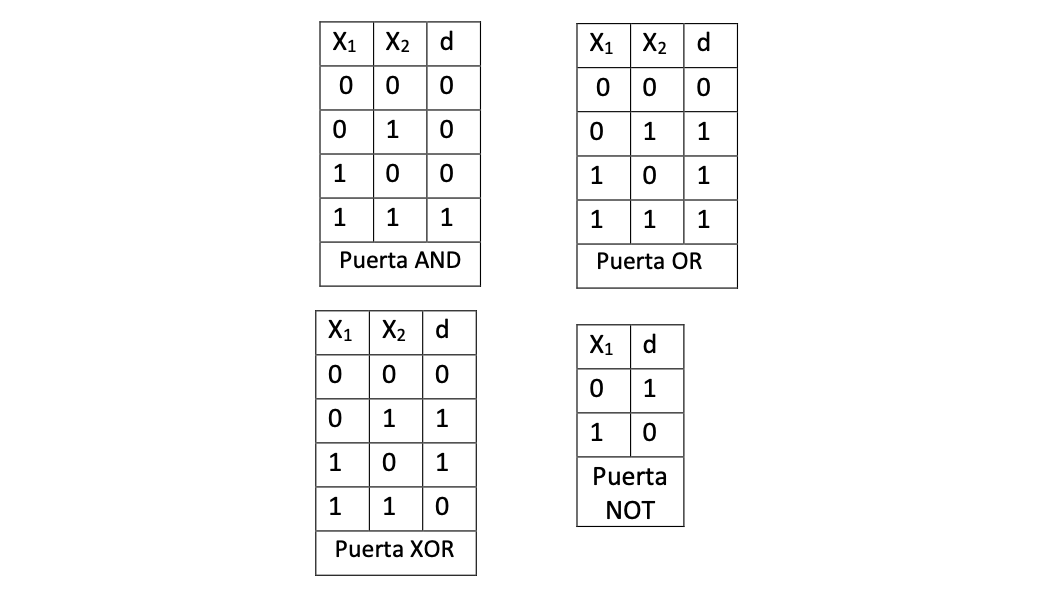

La medida a representar gráficamente son los errores (error de clasificación y error cuadrático) que se producen al pasar todos los patrones frente el número de repeticiones (épocas).

Para los casos bidimensionales (AND, OR y XOR) debes dibujar los puntos coloreados por su salida deseada y la recta de separación obtenida en cada caso.

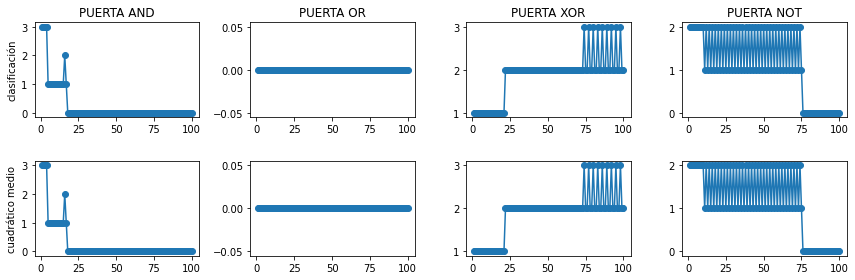

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
#Puerta AND
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,0,0,1]
ppn = SimplePerceptron()
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[0,0].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
axes[0,0].set_title("PUERTA AND")
axes[0,0].set_ylabel("clasificación")
axes[1,0].plot(range(1, len(ppn.errors2) + 1), ppn.errors2, marker='o')
axes[1,0].set_title(" ")
axes[1,0].set_ylabel("cuadrático medio")


#Puerta OR
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [[0],[1],[1],[1]]
ppn = SimplePerceptron()
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[0,1].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
axes[0,1].set_title("PUERTA OR")
axes[1,1].plot(range(1, len(ppn.errors2) + 1), ppn.errors2, marker='o')
axes[1,1].set_title(" ")


#Puerta XOR
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [[0],[1],[1],[0]]
ppn = SimplePerceptron()
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[0,2].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
axes[0,2].set_title("PUERTA XOR")
axes[1,2].plot(range(1, len(ppn.errors2) + 1), ppn.errors2, marker='o')
axes[1,2].set_title(" ")


#Puerta NOT
X = np.array(list(map(list, itertools.product([0, 1], repeat=1))))
y = [[1],[0]]
ppn = SimplePerceptron()
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[0,3].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
axes[0,3].set_title("PUERTA NOT")
axes[1,3].plot(range(1, len(ppn.errors2) + 1), ppn.errors2, marker='o')
axes[1,3].set_title(" ")

plt.tight_layout()
plt.show()

IndexError: ignored

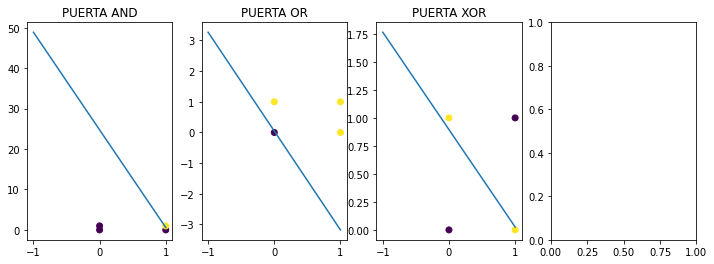

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
#Puerta AND
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,0,0,1]
ppn = SimplePerceptron()
w = ppn.fit(X, y)
A = ((0.5/ppn.weights[2]) - (ppn.weights[0]/ppn.weights[2]))
B = -(ppn.weights[1]/ppn.weights[2])
X1 = np.arange(-1, 2)
X2 = A+B*X1
# Graficamos el número de errores en cada iteración
axes[0].scatter(X[:,0],X[:,1], c = y)
axes[0].plot(X1, X2)
axes[0].set_title("PUERTA AND")

#Puerta OR
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,1,1,1]
ppn = SimplePerceptron()
w = ppn.fit(X, y)
A = ((0.5/ppn.weights[2]) - (ppn.weights[0]/ppn.weights[2]))
B = -(ppn.weights[1]/ppn.weights[2])
X1 = np.arange(-1, 2)
X2 = A+B*X1
# Graficamos el número de errores en cada iteración
axes[1].scatter(X[:,0],X[:,1], c = y)
axes[1].plot(X1, X2)
axes[1].set_title("PUERTA OR")

#Puerta XOR
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,1,1,0]
ppn = SimplePerceptron()
w = ppn.fit(X, y)
A = ((0.5/ppn.weights[2]) - (ppn.weights[0]/ppn.weights[2]))
B = -(ppn.weights[1]/ppn.weights[2])
X1 = np.arange(-1, 2)
X2 = A+B*X1
# Graficamos el número de errores en cada iteración
axes[2].scatter(X[:,0],X[:,1], c = y)
axes[2].plot(X1, X2)
axes[2].set_title("PUERTA XOR")

#Puerta NOT
X = np.array(list(map(list, itertools.product([0, 1], repeat=1))))
y = [1,0]
ppn = SimplePerceptron()
w = ppn.fit(X, y)
A = ((0.5/ppn.weights[1]) - (ppn.weights[0]/ppn.weights[1]))
B = -(ppn.weights[0]/ppn.weights[1])
X1 = np.arange(-1, 2)
X2 = A+B*X1
# Graficamos el número de errores en cada iteración
axes[3].scatter(X[:,0],X[:,1], c = y)
axes[3].plot(X1)
axes[3].set_title("PUERTA NOT")

### 2     Comprobación de funciones linealemnte separables.

El perceptrón nos proporciona un modo indirecto para comprobar si una función es linealmente separable o no (comprobando la convergencia final del algoritmo). Usando el algoritmo implementado en el punto anterior determina si las siguientes funciones lógicas son linealmente separables o no (aquí xx indica el negado (NOT) de x; todas las variables son bin arias y d es la señal deseada):

![](foto1.png)

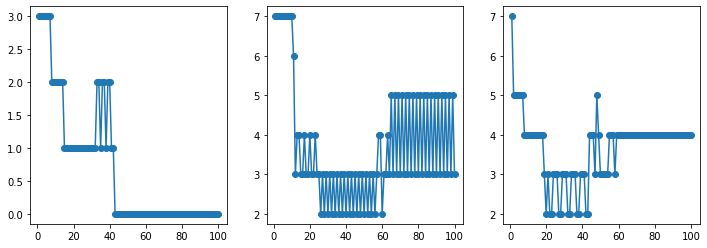

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
###########################
def d1(datos):
    y_1 = []
    for x in datos:
        if len(x) == 3:
            new = x[0]*x[1]*x[2]+int(not(x[0]))*x[2]+int(not(x[1]))*x[0]
            y_1.append(new)
    return np.sign(y_1)

print()
datos = np.array(list(map(list, itertools.product([0, 1], repeat=3))))
y = d1(datos)
ppn = SimplePerceptron()
ppn.fit(datos, y)
# Graficamos el número de errores en cada iteración
axes[0].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')

###########################
def d1(datos):
    y_1 = []
    for x in datos:
        if len(x) == 4:
            new = x[0]*x[1]*x[3]+int(not(x[0]))*x[3]+int(not(x[2]))*x[3]+x[0]*x[1]
            y_1.append(new)
    return np.sign(y_1)

datos = np.array(list(map(list, itertools.product([0, 1], repeat=4))))
y = d1(datos)
ppn = SimplePerceptron()
ppn.fit(datos, y)
# Graficamos el número de errores en cada iteración
axes[1].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')

###########################
def d1(datos):
    y_1 = []
    for x in datos:
        if len(x) == 4:
            new = x[0]*x[1]*int(not(x[0]))*x[3]+int(not(x[1]))*x[2]+int(not(x[0]))*x[3]+x[1]*x[3]
            y_1.append(new)
    return np.sign(y_1)
datos = np.array(list(map(list, itertools.product([0, 1], repeat=4))))
y = d1(datos)
ppn = SimplePerceptron()
ppn.fit(datos, y)
# Graficamos el número de errores en cada iteración
axes[2].plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')

### 3     ADALINE. Algoritmo LMS.

Vuelve a determinar el primer apartado pero usando el modelo ADALINE con el algoritmo LMS (Least Mean Square); recuerda que en el perceptrón la salida se obtiene tras la función signo mientras que en el caso de la Adaline se considera la salida antes de la función signo. Ten en cuenta que debes desplazar el resultado de la suma ponderada de la misma forma que en el perceptrón para tener el umbral de decisión en 0.5.


In [ ]:
class Adaline_k():
    
    #método __init__ en el que pondremos como parámetros de entrada 
    #la tasa de aprendizaje y el número de iteraciones
    def __init__(self, eta=0.0001, n_iter=50):
        """
        :param eta: tasa de aprendizaje
        :param n_iter: número de iteraciones(epochs)
        """
        self.eta = eta
        self.n_iter = n_iter
    
    #método zeta que nos calcule el valor de la función z 
    #(el producto de las características por sus pesos):
    def zeta(self, X):
            """
            Calcula el producto de las entradas por sus pesos
            :param X: datos de entrenamiento con las caracteristicas. Array
            """
            res = np.dot(1, self.weights[0]) + np.dot(X, self.weights[1:])
            return res
    
    #También añadimos la función de activación, 
    #que en nuestro caso hemos dicho que tomará el mismo valor que zeta:
    def activacion(self, X):
        """
        Función lineal de activacion. En este caso sera la misma que zeta
        """
        return self.zeta(X)
    
    #método fit, que se encargará de ir comprobando los errores, 
    #actualizar los pesos y calcular el valor de la función de coste:
    def fit(self, X, y):
        #Generamos pesos iniciales aleatorios
        self.weights = np.random.random_sample((X.shape[1] + 1,))
        
        #Creamos dos listas para añanir el valor de la funcion de coste
        #y el número de iteración
        self.iters = []
        self.coste = []
        self.errors = []
        #Comenzamos las iteraciones (epochs)
        for iter in range(self.n_iter):
            #Calculamos el producto de las entradas por sus pesos, esto es, 
            #la función zeta
            zeta = self.zeta(X)
            #Calculamos los errores entre las salidas obtenidas y las esperadas
            errors = (y - zeta)
            #Actualizamos los pesos
            self.weights[1:] += self.eta * X.T.dot(errors)
            self.weights[0] += self.eta * errors.sum()
            #Calculamos el valor de la funcion de coste
            coste = 0.5*np.power(errors, 2).sum()
            #Guardamos el valor del guardiente de la funcion de coste
            #y tambien guardamos el número de iteración (epoch)
            self.coste.append(coste)
            self.iters.append(iter)
            self.errors.append(errors)
        print ('_________________________________________')
        print ('Modelo Adaline_k entrenado correctamente:')
        print ('Pesos finales: %s' %str(self.weights))
        print ('Coste: %s' %str(self.coste))
        print ('Errores: %s' %str(errors))
        print ('_________________________________________')
        print (' ')
        
        #método predict, que será el encargado de clasificar en función del valor de la función de activación:
    def predict(self, X):
        """
        Calcula la salida de la neurona teniendo en cuenta la función de activación
        :param X: datos con los que predecir la salida de la neurona. Array
        :return: salida de la neurona
        """
        return np.where(self.activacion(X) >= 0.5, 0, 1)

_________________________________________
Modelo Adaline_k entrenado correctamente:
Pesos finales: [0.00697288 0.82277743 0.44631902]
Coste: [1.3796366941256049, 1.2293308630694308, 1.0974811291774498, 0.981812063896158, 0.8803289571353764, 0.7912831815157284, 0.7131418301354762, 0.6445611005686737, 0.5843629628660512, 0.5315147063621256]
Errores: [-0.02369478 -0.47791698 -0.85817799 -0.31240018]
_________________________________________
 
_________________________________________
Modelo Adaline_k entrenado correctamente:
Pesos finales: [0.40528983 0.25553373 0.48081107]
Coste: [0.16448710156443325, 0.163864520799287, 0.16325246597970614, 0.16265072885071824, 0.1620591080144088, 0.16147740842292813, 0.16090544092775402, 0.16034302187838997, 0.1597899727645154, 0.1592461198963429, 0.1587112941185806, 0.1581853305539644, 0.1576680683728195, 0.1571593505855475, 0.15665902385531333]
Errores: [-0.40623176  0.11267527  0.34022814 -0.14086483]
_________________________________________
 
_____

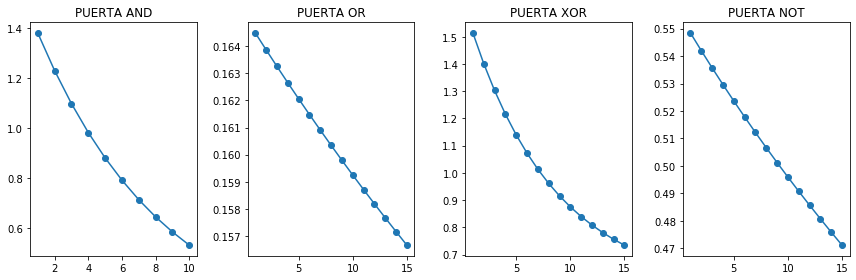

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

#Puerta AND
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,0,0,1]
ppn = Adaline_k(n_iter=10,eta=0.01)
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[0].plot(range(1, len(ppn.coste) + 1), ppn.coste, marker='o')
axes[0].set_title("PUERTA AND")

#Puerta OR
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,1,1,1]
ppn = Adaline_k(n_iter=15,eta=0.01)
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[1].plot(range(1, len(ppn.coste) + 1), ppn.coste, marker='o')
axes[1].set_title("PUERTA OR")

#Puerta XOR
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = [0,1,1,0]
ppn = Adaline_k(n_iter=15,eta=0.01)
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[2].plot(range(1, len(ppn.coste) + 1), ppn.coste, marker='o')
axes[2].set_title("PUERTA XOR")

#Puerta NOT
X = np.array(list(map(list, itertools.product([0, 1], repeat=1))))
y = [1,0]
ppn = Adaline_k(n_iter=15,eta=0.01)
ppn.fit(X, y)
# Graficamos el número de errores en cada iteración
axes[3].plot(range(1, len(ppn.coste) + 1), ppn.coste, marker='o')
axes[3].set_title("PUERTA NOT")
   
plt.tight_layout()
plt.show()

Si inicializas de forma diferente, ¿qué obtienes en el caso del perceptrón? ¿y en el caso de la Adaline?

### 4     Aplicación práctica. Algoritmo LMS. Eliminación variación línea base.

En la asignatura Señales y Sistemas se vio el problema de la línea basal en un electrocardiograma. Aquí lo vamos a ver desde otro punto de vista; aplicación de un filtro adaptativo de un solo coeficiente. Se plantea un esquema típico de cancelación de eco como se muestra en la siguiente figura:

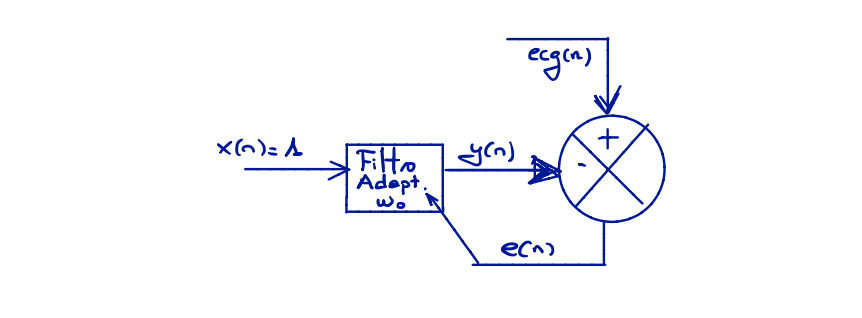

En este problema nos planteamos eliminar dicha variación que suponemos muy lenta (representa la señal y lo verás) por lo que asumiremos que dicha variación es igual a un valor constante; ese valor lo representaremos por wo. Según esto la función de coste sería:

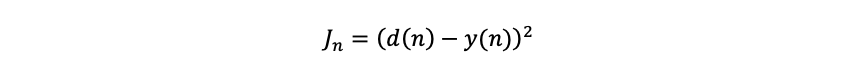

Siendo y(n) la salida del filtro adaptativo (recuerda que en este caso la salida del filtro es y(n)=w_0⋅1).

Vamos a implementar el algoritmo LMS en este caso conociendo que:

1. d(n) es la señal deseada, en este caso es la señal del electrocardiograma que se encuentra en el fichero ecg.mat.
2. Lo que se busca representar es el error cometido, e(n) = d(n) − y(n), en cada iteración, que corresponderá a la señal ecg con la corrección de línea de base.

Comprueba el funcionamiento del sistema para diferentes constantes de adaptación.